In [120]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [123]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [124]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [125]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [126]:
data['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

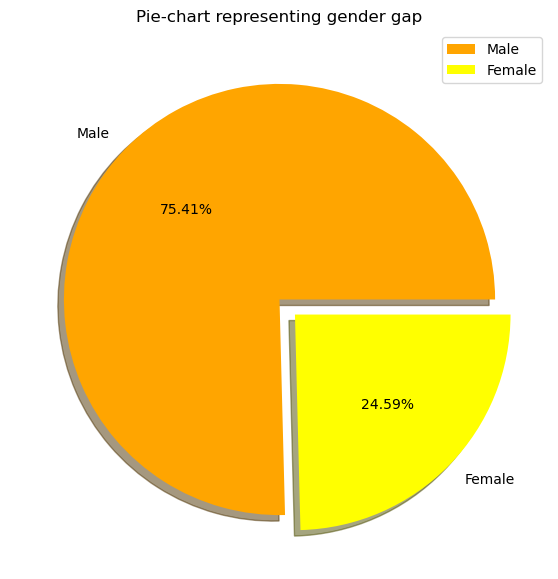

In [127]:
# pie chart 

size = [405380,132197]
labels = ['Male','Female']
colors = ['orange','yellow']
explode = [0,0.1]

plt.pie(size,labels=labels,colors=colors,explode=explode,shadow = True,autopct = '%.2f%%')
plt.title('Pie-chart representing gender gap')
plt.legend()
plt.show()

In [128]:
# finding the maximum purchase in both male and female

data.groupby('Gender')['Purchase'].max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [129]:
# finding the minimum purchase in both male and female

data.groupby('Gender')['Purchase'].min()

Gender
F    185
M    185
Name: Purchase, dtype: int64

In [130]:
# checking dependency of gender on purchase

data.groupby('Gender')['Purchase'].mean()

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

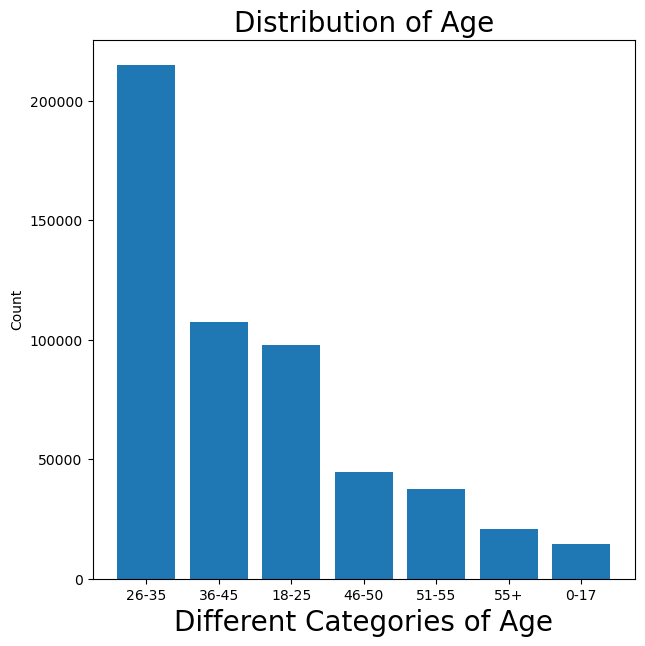

In [131]:
# visualizing the age of customers
val_cnt=data['Age'].value_counts()

plt.bar(val_cnt.index,val_cnt.values)
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Different Categories of Age', fontsize = 20)
plt.ylabel('Count')
plt.show()

In [132]:
#mean of each category in age column
data[['Age', 'Purchase']].groupby('Age').mean() #purchase means mean value

,Purchase
Age,
0-17,9020.126878
18-25,9235.197575
26-35,9314.588970
36-45,9401.478758
46-50,9284.872277
51-55,9620.616620
55+,9453.898579


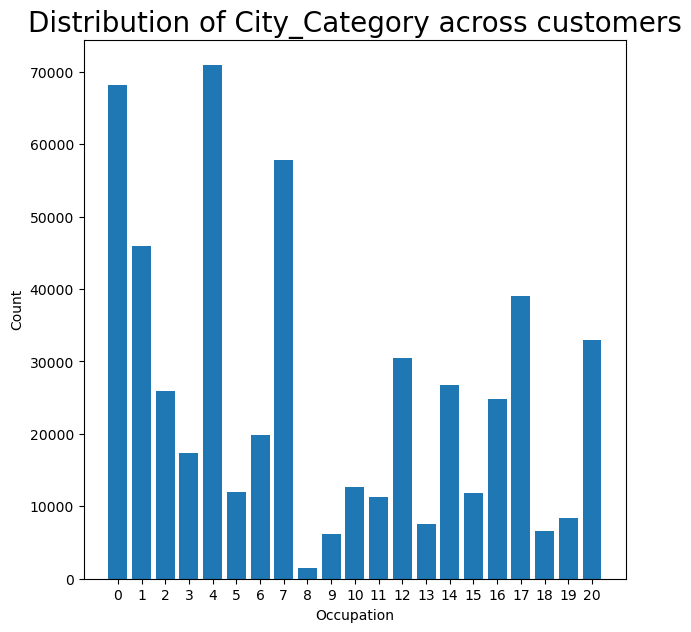

In [133]:
#visualizing Distribution of Occupation
count_data = data['Occupation'].value_counts()

plt.bar(count_data.index, count_data.values)
plt.title('Distribution of City_Category across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(count_data.index)
plt.show()

In [134]:
# checking the dependency of occupation on purchasing power

data[['Occupation', 'Purchase']].groupby('Occupation').mean()

,Purchase
Occupation,
0,9186.946726
1,9017.703095
2,9025.938982
3,9238.077277
4,9279.026742
5,9388.848978
6,9336.378620
7,9502.175276
8,9576.508530


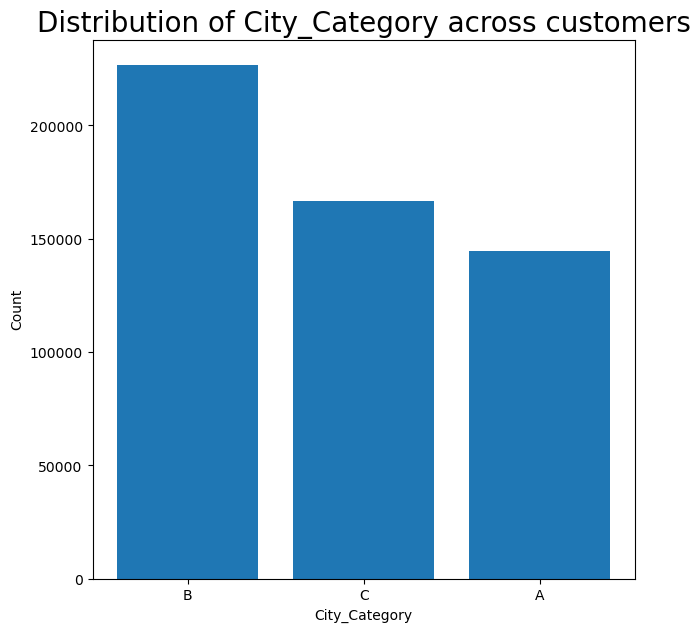

In [135]:
# visulaizing the cities the customers are from

count_data = data['City_Category'].value_counts()

plt.bar(count_data.index, count_data.values)
plt.title('Distribution of City_Category across customers', fontsize = 20)
plt.xlabel('City_Category')
plt.ylabel('Count')
plt.xticks(count_data.index)
plt.show()

In [136]:
# checking the dependency of City_Category on purchasing power

data[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8958.011014
B,9198.657848
C,9844.441855


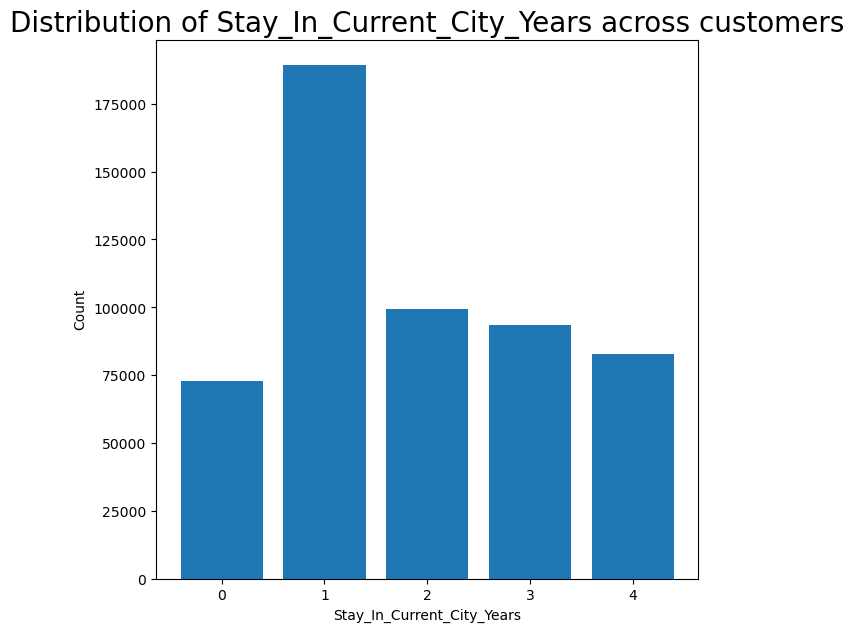

In [137]:
# we need to label the 4+ to 5 to visualize the stay of customers in a city

# we need to label the 4+ to 5 to visualize the stay of customers in a city
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4,})

count_data = data['Stay_In_Current_City_Years'].value_counts()

plt.bar(count_data.index, count_data.values)
plt.title('Distribution of Stay_In_Current_City_Years across customers', fontsize = 20)
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Count')
plt.xticks(count_data.index)
plt.show()

In [138]:
# checking the dependency of stay in purchasing power

data[['Stay_In_Current_City_Years', 'Purchase']].groupby('Stay_In_Current_City_Years').mean()

,Purchase
Stay_In_Current_City_Years,
0,9247.238625
1,9319.865095
2,9397.607316
3,9350.685121
4,9346.370158


In [139]:
# visualizing the Marital Status

data['Marital_Status'].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

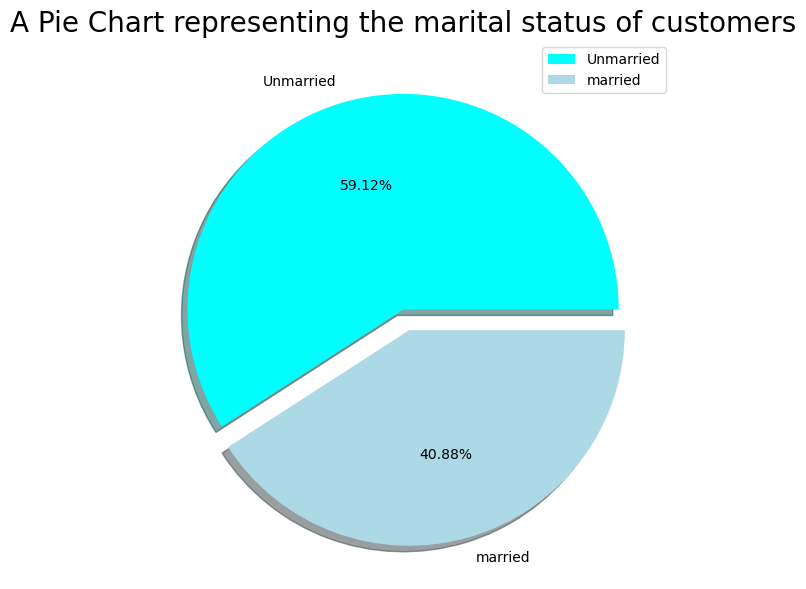

In [140]:
# pie chart 

size = [317817, 219760]
labels = ['Unmarried', 'married']
colors = ['cyan', 'lightblue']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the marital status of customers', fontsize = 20)
plt.legend()
plt.show()

In [141]:
# checking the dependency of marital status on purchasing power

data[['Marital_Status', 'Purchase']].groupby('Marital_Status').mean()

,Purchase
Marital_Status,
0,9333.325467
1,9334.632681


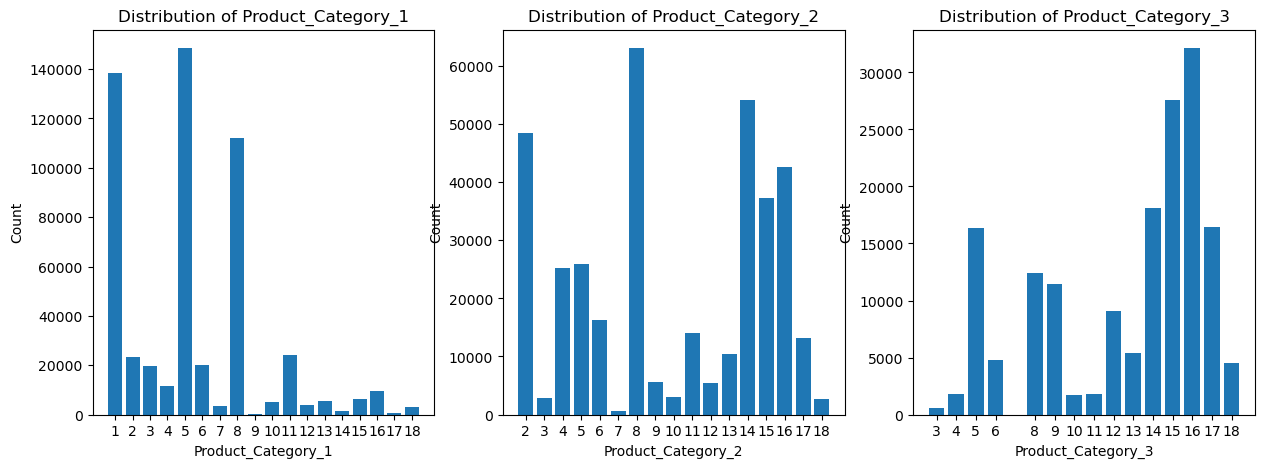

In [142]:
# visualizing the product category 1
plt.rcParams['figure.figsize'] = (15, 5)

count_data = data['Product_Category_1'].value_counts().sort_index()
plt.subplot(131)
plt.bar(count_data.index, count_data.values)
plt.title('Distribution of Product_Category_1')
plt.xlabel('Product_Category_1')
plt.ylabel('Count')
plt.xticks(count_data.index)

plt.subplot(132)
count_data = data['Product_Category_2'].value_counts().sort_index()
plt.bar(count_data.index, count_data.values)
plt.title('Distribution of Product_Category_2')
plt.xlabel('Product_Category_2')
plt.ylabel('Count')
plt.xticks(count_data.index)

plt.subplot(133)
count_data = data['Product_Category_3'].value_counts().sort_index()
plt.bar(count_data.index, count_data.values)
plt.title('Distribution of Product_Category_3')
plt.xlabel('Product_Category_3')
plt.ylabel('Count')
plt.xticks(count_data.index)
plt.show()

plt.show()

In [143]:
data[['Product_Category_1','Purchase']].groupby('Product_Category_1').mean()

,Purchase
Product_Category_1,
1,13607.701495
2,11255.680752
3,10096.841705
4,2328.862886
5,6238.004045
6,15837.893573
7,16373.830153
8,7497.354850
9,15538.297030


In [144]:
data[['Product_Category_2','Purchase']].groupby('Product_Category_2').mean()

,Purchase
Product_Category_2,
2.0,13621.740682
3.0,11229.532628
4.0,10218.319009
5.0,9034.054649
6.0,11500.585872
7.0,6877.234146
8.0,10278.036363
9.0,7282.593633
10.0,15656.014711


In [145]:
data[['Product_Category_3','Purchase']].groupby('Product_Category_3').mean()

,Purchase
Product_Category_3,
3.0,13957.166667
4.0,9778.290761
5.0,12128.351770
6.0,13189.812785
8.0,13029.554102
9.0,10429.594533
10.0,13522.985866
11.0,12112.626622
12.0,8718.752144


C:\Users\chris\AppData\Local\Temp\ipykernel_25004\996224561.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Purchase'], color = 'purple', fit = norm)


The mu 9333.859852635065 and Sigma 4981.017499809046 for the curve


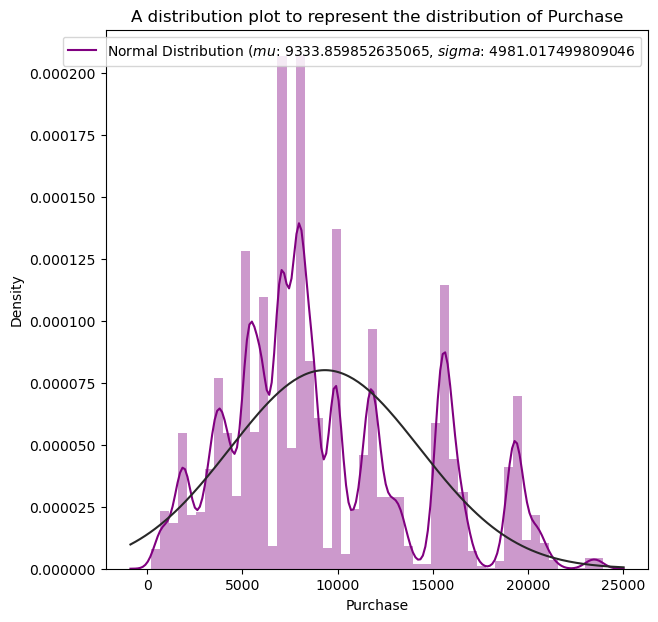

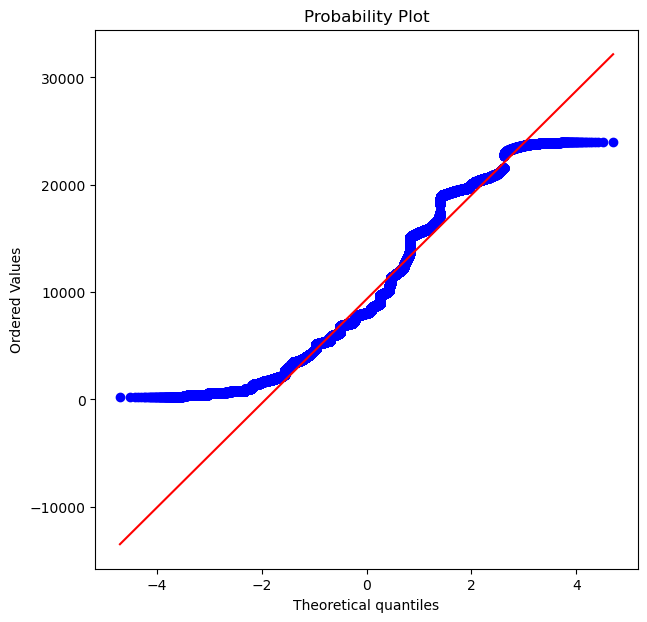

In [146]:
# visualizing the purchase attribute which is our target variable

# importing important libraries
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (7, 7)
sns.distplot(data['Purchase'], color = 'purple', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(data['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

# plotting the QQplot
stats.probplot(data['Purchase'], plot = plt)
plt.show()

In [147]:
# looking at the columns of the dataset

data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [148]:
# removing unwanted columns

# saving the attributes User_ID and Product_ID before deleting them
User_ID = data['User_ID']
Product_ID = data['Product_ID']

data = data.drop(['User_ID', 'Product_ID'], axis = 1)

# checking the new shape of data
data.shape

(537577, 10)

In [149]:
# filling the missing values

data['Product_Category_2'].fillna(0, inplace = True)
data['Product_Category_3'].fillna(0, inplace = True)

data.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [150]:
# making dummies of variables
# performing one hot encoding
data_onehot_enc = pd.get_dummies(data[['Gender','Age','City_Category']])
data_onehot_enc.head(2)

data = data.drop(['Gender', 'Age','City_Category'], axis = 1)

joined = pd.concat([data,data_onehot_enc], axis=1)

In [151]:
joined.shape

(537577, 19)

In [152]:
# splitting the data into dependent and independents sets

y = joined['Purchase']

# now removing the purchase column from the dataset

x = joined.drop(['Purchase'], axis = 1)

# checking the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (537577, 18)
Shape of y:  (537577,)


In [153]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (376303, 18)
Shape of x_test:  (161274, 18)
Shape of y_train:  (376303,)
Shape of y_test:  (161274,)


In [154]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Modeling

In [162]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4626.681093165721
R2 Score: 0.13771549779099967


In [165]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Lasso()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4626.692739073761
R2 Score: 0.1377111568396987


In [166]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2941.136838215152
R2 Score: 0.6515488428688831
